**Author: John Paul Goodman**

**Course: ISyE 6644**

**Semester: Fall 2021**

**Project Group: 40**

# RandomVariates

**A library for generating random values from probability distributions**

## Introduction

RandomVariates is a library of random variate generation routines.
The purpose behind this library was purely for educational purposes as 
a way to learn how to generate random variates using such methods as 
inverse transform, convolution, acceptance-rejection and composition 
methods. Additionally, this project was an excuse to get familiar with 
random number generators such as linear congruential generators, 
Tausworthe Generators and Widynski's "Squares: A Fast Counter-Based RNG"

## Pseudo Random Number Generators

The following pseudo random number (PRN) generators are contained in this project:

* A basic "desert island" linear congruential (implemented in the uniform function)
* taus() and tausunif(): A basic Tausworthe PRN generator and a Tausworthe Uniform PRN generator
* squaresrng(): Widynski's "Squares: A Fast Counter-Based RNG" 
    * https://arxiv.org/pdf/2004.06278.pdf 

### Helper functions 

The RandomVariates library contains various helper functions to take advantage of the PRN generators. These include:

* **randseed()**: Helper function to grab a "smaller" PRN from the Widynski squares PRN generator
* **generateseed()**: Helper function to generate random seeds if the initial seed has not been set
* **set_seed()** and **get_seed()**: Functions to get and set the seed.
* **reverse()**: Helper function to reverse an integer 

## Random Variate Generation Routines

* <u>**uniform()**</u>: Routine to generate uniform random values between a and b: **Default uniform(a=0, b=1)**

* <u>**norm()**</u>: Method to generate random normals: **Default norm(mu=0, sd=1)**

* <u>**exponential()**</u>: Generate exponential random variates: **Default exponential(lam=1)**

* <u>**erlang()**</u>: Routine to generate Erlang_k(lambda) random values: **Default erlang(lam=1, k=1, n=1)**

* <u>**weibull()**</u>: Method to generate weibull random variates: **Default weibull(lam=1, beta=1)**

* <u>**triangular()**</u>: Generate triangular random values with **a** lower bound, **b** mode and **c** upper bound: **Default triangular(a=0, b=1, c=2)**

* <u>**bernoulli()**</u>: Function to generate bernoulli random variates: **Default bernoulli(p=0.5)**

* <u>**Binomial()**</u>: Routine to generate binomial random values: **Default binomial(t=1, p=0.5)**

* <u>**dicetoss()**</u>: Simple/fun method to generate X-sides dice toss: **Default is a simple 6-sided dicetoss(sides=6)**

* <u>**geometric()**</u>: Method to generate geometric random values: **Default geometric(p=0.5)**

* <u>**negbin()**</u>: Routine to generate discrete random negative binomials: **Default negbin(t=1, p=0.5)**

* <u>**chisq()**</u>: Generate Chi-squared random variates: **Default chisq(df=1)**

* <u>**poisson()**</u>: Method to generate Poisson random variates: **Default poisson(lam=1)**

* <u>**gamma()**</u>: Gamma random variates shape parameter k and a scale parameter θ. Implementation is based on Marsaglia and Tsang's transformation-rejection method of generating gamma random variates (https://dl.acm.org/doi/10.1145/358407.358414): **Default gamma(k=1.0, theta=1)**

* <u>**lognormal()**</u>: Generate lognormal random variates: **Default lognormal(mu=0, sd=1)**

* <u>**beta()**</u>: Routine to generate beta random values: **Default beta(a=1, b=1)**

### Limitations
* Unlike Numpy's random variate generation routines, these are written
in python. Numpy's random routines are written in C hence are much, much faster.
* Beta and Gamma distributions only accept a, b, k and theta greater than one. 
Other random variate implementations, such as Numpy can handle values between
0 and 1.
* Setting the seed does not affect the Tausworthe and Tausworthe Uniform PRN 
generators

### Distributions not currently implemented
* Pearson Type V
* Pearson Type VI
* Log-Logistic
* Johnson Bounded and Johnson unbounded
* Bézier
* Others ...

## Installation

### Requirements:

* **Python 3.x**
* **pip** (https://pip.pypa.io/en/stable/installation/)
* **numpy**: If numpy is not installed, the pip command below will automatically install numpy.

To install the library, simply run the command:

* **pip install randvars**

The pip package can be located here: https://pypi.org/project/randvars/

Source code can be located here: https://github.com/jgoodie/randomvariates

In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from collections import defaultdict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Usage
To use the RandomVariates library, you need to import the library into your python script then 
create an instance of RandomVariates:

In [2]:
import randomvariates
rv = randomvariates.random.RandomVariates()

Alternately, you can import random from randomvariates:

In [3]:
from randomvariates import random
rv = random.RandomVariates()

### Seeds
By default, a seed is not set (None) when an instance or randomvariates is called.

When a seed is set to None, randomvariates will randomly generate values for the
various random variate routines. 

For repeatability, we can set a seed by calling 
the *set_seed()* method. Once a seed has been set, we can verify by calling the 
*get_seed()* method.

In [4]:
rv.set_seed(42)
rv.get_seed()

42

### Pseudo Random Number Generators
To call the Widynski Squares PRN we can call the **squaresrng()** method. 

The **squaresrng()** method takes a center and key value. By default, the center
and key are set to 1: 

**squaresrng(ctr=1, key=1)**

In [5]:
rv.squaresrng(42,21)

22904061750312427071608663841693658494663185320788517623007713567980053732104718807902410691731255108163475339984462249791973853173096390867949739437289512015166556428304384

As of version 0.0.17, the Tausworthe PRN  and Tausworthe Uniform PRN generator does 
not take a seed value (See Limitations above)

To call the Tausworthe generators, simply call **taus()** and **tausunif()**.

By default **taus()** will generate 100 binary PRNs and **tausunif()** will generate 
a single uniform(0,1):

In [6]:
# rv.taus(n=100)
rv.taus()

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [7]:
# rv.tausunif(n=1)
rv.tausunif()

array([0.79839773])

**Let's look at the Tausworthe uniform values to see what we get for a mean and variance:**

In [16]:
unifs = rv.tausunif(n=100000)
print(np.mean(unifs))
print(np.var(unifs)) # 1/12 = 0.0833333333

0.501121574042574
0.08331920021127996


**Plot of the Tausworthe generated uniforms.**

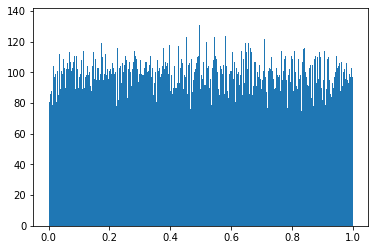

In [17]:
plt.hist(unifs, bins=1000)
plt.show()

**Chi-squared goodness of fit for the Tausworthe generated uniforms**

Note the test statistic of 2.0545 and p-value of 0.97929. As a sanity check, the 

Chi-squared with df=9 at an alpha of 0.05 we get 16.919. From the output below we it's obvious that 2.0545 is less than 16.919 which makes sense given our huge p-value of 0.97929. **In this case we fail to reject H0.**

https://people.richland.edu/james/lecture/m170/tbl-chi.html

In [27]:
n=10
unifs = rv.tausunif(n=n)
exp = np.ones(n)*0.5
stats.chisquare(f_obs=unifs, f_exp=exp, ddof=1, axis=0)

Power_divergenceResult(statistic=2.054509188194602, pvalue=0.9792950301323791)

**Linear Congruential Generator (LCG) and Uniform Distribution**

The primary Uniform PRN generator for the randomvariates library is based off a "desert island" LCG of the form:


\begin{align}
X_{i} = 16807X_{i-1} mod(2^{32} - 1)
\end{align}


**To call the uniform PRN generator simply call uniform() method:**

In [28]:
rv.uniform()

array([0.05257237])

**To generate more than one unif(0,1), call the method with n=X where X is the number 
of unif(0,1)s to generate:**

In [29]:
rv.uniform(n=25)

array([0.05257237, 0.58375326, 0.14097247, 0.32435023, 0.35433263,
       0.26846135, 0.0299879 , 0.00658945, 0.74895567, 0.69787797,
       0.23502476, 0.06106509, 0.32097407, 0.61113629, 0.36767406,
       0.49790078, 0.21841041, 0.82377019, 0.10552924, 0.62995875,
       0.71667283, 0.12018592, 0.96479814, 0.36233659, 0.79098412])

**If we want to generate something other than unif(0,1), we can call the function
with a=X and b=Y where X and Y are the lower and upper bounds of the uniform 
distribution:**

In [30]:
rv.uniform(a=7, b=11, n=25)

array([ 7.21028946,  9.33501302,  7.56388989,  8.29740092,  8.41733051,
        8.07384542,  7.11995159,  7.02635782,  9.99582266,  9.79151188,
        7.94009902,  7.24426036,  8.28389627,  9.44454517,  8.47069623,
        8.99160312,  7.87364164, 10.29508075,  7.42211697,  9.51983499,
        9.8666913 ,  7.48074369, 10.85919256,  8.44934634, 10.16393646])

**Again, as we did with the Tausworthe uniforms, let's check the mean and variance:**

Note: Our "desert island" generator seems to be much better than the Tausworthe version. Looking at the variances between the two, the Tausworthe uniforms are a bit more variable.

In [31]:
unifs = rv.uniform(n=1000000)
print(np.mean(unifs)) # 0.5
print(np.var(unifs)) # 1/12 = 0.0833333333

0.49926189331773324
0.08334189169747183


**Check for uniformity by running a goodness of fit test**

Note the large p-value. We fail to reject H0, there's not enough evidence to say these aren't uniform

In [32]:
n=10
unifs = rv.uniform(n=n)
exp = np.ones(n)*0.5
stats.chisquare(f_obs=unifs, f_exp=exp, ddof=1, axis=0)

Power_divergenceResult(statistic=2.0145775757113675, pvalue=0.9805616826416578)

**Again, let's plot the uniforms to see what they look like**

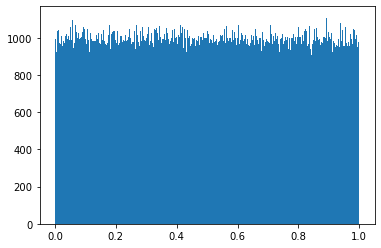

In [33]:
unifs = rv.uniform(n=1000000)
plt.hist(unifs, bins=1000)
plt.show()

**Note when we generate two sets of uniforms with the same seed and plot them against each other, we get a straight line**

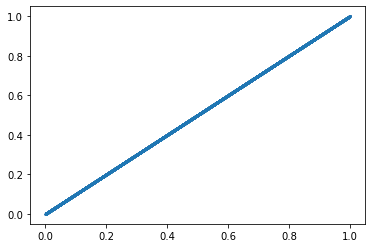

In [34]:
x = rv.uniform(n=100000)
y = rv.uniform(n=100000)

plt.scatter(x, y, s=0.8, alpha=0.2)
plt.show()

**Let's try again with each uniform having a different seed**

Note how the image below looks like TV static.

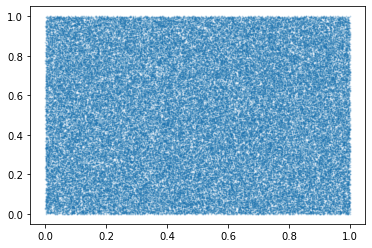

In [35]:
rv.set_seed(0)
x = rv.uniform(n=100000)
rv.set_seed(1)
y = rv.uniform(n=100000)

plt.scatter(x, y, s=0.8, alpha=0.2)
plt.show()

**To make sure we don't get any "RANDU" effects, let's create a 3-D plot**

Notice how the image below looks like a big static square.

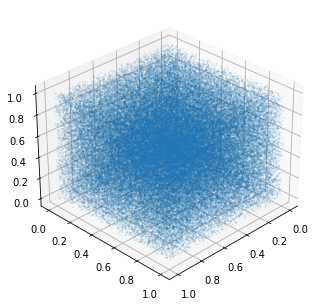

In [36]:
x = random.RandomVariates()
x.set_seed(1*3.141)

y = random.RandomVariates()
y.set_seed(2*3.141)

z = random.RandomVariates()
z.set_seed(3*3.141)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False, azim=45)
fig.add_axes(ax)

sequence_containing_x_vals = x.uniform(n=100000)
sequence_containing_y_vals = y.uniform(n=100000)
sequence_containing_z_vals = z.uniform(n=100000)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, s=0.8, alpha=0.1)
plt.show()

### Normal Distribution


To generate random normal random variates, call the **norm()** function. By default, 
the **norm()** function will generate values with mean = 0 and standard deviation = 1.


In [37]:
rv.set_seed(42) # Set our seed back to 42
rv.norm(n=25)

array([-1.41895603,  1.03055739,  0.64797237, -0.54395554,  1.41565353,
       -1.58770622, -2.02602564, -0.29023875,  0.71303646, -0.09758493,
        0.67348912, -1.57582437,  0.2270985 , -0.10001884,  0.41797698,
       -0.99798613, -1.73261847,  0.53073999,  1.78233654,  0.94442933,
       -0.38071356, -0.51034473,  0.22164846, -0.66787692, -0.32286354])

**To generate normals with other means and standard deviations, simply specify them 
when calling the function:**

In [38]:
rv.norm(mu=42, sd=21, n=25)

array([12.20192344, 63.64170513, 55.60741974, 30.57693373, 71.72872421,
        8.65816942, -0.54653844, 35.90498633, 56.97376558, 39.95071654,
       56.14327153,  8.90768817, 46.76906844, 39.89960435, 50.77751655,
       21.04229136,  5.61501208, 53.1455398 , 79.42906729, 61.83301601,
       34.00501532, 31.28276068, 46.65461775, 27.97458477, 35.21986557])

**To check that our Nor(0,1) are generating a mean of 0 and variance of 1**

In [40]:
z = rv.norm(n=1000000)
mean = np.mean(z)
var = np.var(z)
print(f"mean: {mean}")
print(f"var: {var}")

mean: -0.0010792786142373445
var: 1.0020209597387706


**Do our normals, look normal?**

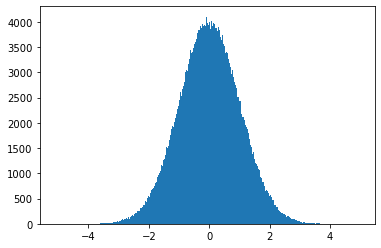

In [41]:
z = rv.norm(mu=0, sd=1, n=1000000)
plt.hist(z, bins=1000)
plt.show()

**Let's see what the Q-Q plot looks like:**

Note that our random normals fall nicely on the 45 degree line.

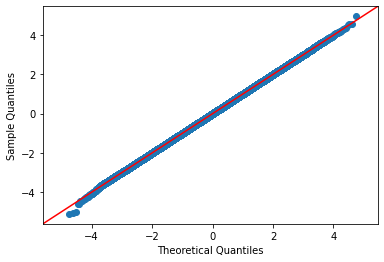

In [42]:
z = rv.norm(mu=0, sd=1, n=1000000)
sm.qqplot(z, line='45');

**Finally let's run a Shapiro Wilk test for normality.**

Note the test statistic and p-value. Since the p-value is much greater that 0.05, we fail to reject the null hypothesis.

In [43]:
z = rv.norm(mu=0, sd=1, n=25)
stats.shapiro(z)

ShapiroResult(statistic=0.9745835065841675, pvalue=0.7614504098892212)

### Exponential Random Variates

To generate exponential random values, we can call the the **exponential()** function.

By default, the **exponential()** function will generate a single, lambda=1 random variate.

In [44]:
rv.exponential()

array([0.05400472])

To generate exponentials with different rates (lambda), call the exponential function
with lam=X:

In [45]:
rv.exponential(lam=3, n=25)

array([0.01800157, 0.29215902, 0.05065144, 0.13069348, 0.1458236 ,
       0.10420174, 0.01014891, 0.00220375, 0.46070858, 0.39897476,
       0.08930394, 0.02100304, 0.12903199, 0.31484212, 0.15278343,
       0.22965251, 0.08214183, 0.57865546, 0.03717436, 0.33138026,
       0.42038432, 0.04268156, 1.11555212, 0.14998157, 0.52178168])

**Check the mean and variance of our exponential random variates.**

If lambda is 2, then we should see a mean of 1/2 and variance of 1/4

In [46]:
# expo mean = 1/lam
# expo var = 1/lam^2
e = rv.exponential(lam=2, n=1000000)
mean = np.mean(e)
var = np.var(e)
print(f'mean: {mean}') # 1/2
print(f'var: {var}') # 1/4

mean: 0.499091656691787
var: 0.25017014791880715


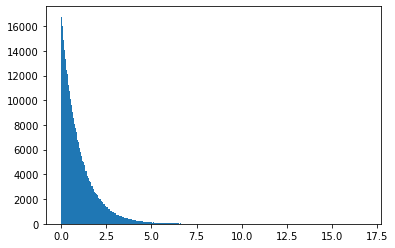

In [47]:
e = rv.exponential(lam=1, n=1000000)
plt.hist(e, bins=1000)
plt.show()

**Chi-squared goodness-of-fit for Exponentials**

In [48]:
rv.set_seed(55)
e_obs = rv.exponential(lam=1/9, n=100)
mean = np.mean(e_obs)
var = np.var(e_obs)
print(f'mean: {mean}') # 9.00

mean: 9.00471853961017


In [49]:
# 0.2 = 1/5 or 5 intervals
for i in range(5):
    print(-9*np.log(1-0.2*i))

-0.0
2.0082919618278874
4.597430613893916
8.246616586867399
14.484941211906904


In [50]:
intervals = defaultdict(int)
for e in e_obs:
    if 0.0 <= e < 2.01:
        intervals[1] += 1
    elif 2.01 <= e < 4.60:
        intervals[2] += 1
    elif 4.60 <= e < 8.25:
        intervals[3] += 1
    elif 8.25 <= e < 14.48:
        intervals[4] += 1
    else:
        intervals[5] += 1

\begin{align}
X^{2}_{0.05,3} = 7.81
\end{align}

Since χ0 is less than 7.81 we fail to reject the null hypothesis

In [51]:
Oi = np.array(list(intervals.values()))
Ei = np.ones(5)*(100/5)
x0 = np.sum(((Oi - Ei)**2)/Ei)
x0

1.9

### Erlang Random Variates

Random Erlang variates can be generated by calling the **erlang()** function. 

By default, the erlang function will generate variates with lambda = 1 and shape (k) = 1:

In [52]:
rv.erlang()

array([2.90653443])

To generate erlangs with different rate and shape parameters, set lam=X and k = Y,
where X is the lambda rate and Y is the shape:

In [53]:
rv.erlang(lam=5, k=5, n=25)

array([1.80165983, 1.58274981, 0.92871473, 0.52756431, 0.53273064,
       1.67822669, 1.45200378, 0.75477015, 1.05308769, 0.39410616,
       0.98431467, 1.02531066, 0.56406195, 0.64748447, 1.35281805,
       1.18196551, 1.29296929, 0.55254751, 0.46277568, 0.79741588,
       1.88896114, 1.33347742, 1.04105106, 1.36739384, 1.15008453])

**Let's create some plots of our erlang random values**

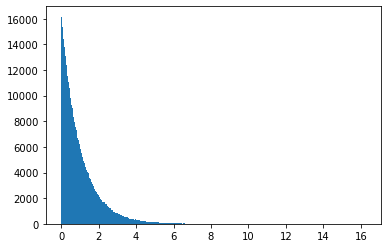

In [54]:
erls = rv.erlang(lam=1, k=1, n=1000000)
plt.hist(erls, bins=1000)
plt.show()

**Note the shape when we specify k = 3**

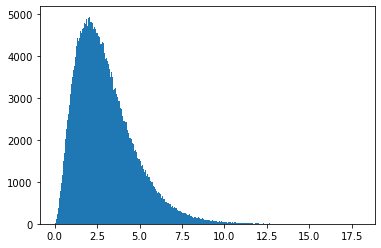

In [55]:
erls = rv.erlang(lam=1, k=3, n=1000000)
plt.hist(erls, bins=1000)
plt.show()

### Weibull Random Variates

To generate values from the Weibull distribution, call the **weibull()** method with 
lam and beta. By default, lam and beta are set to 1 weibull(self, lam=1, beta=1).

In [56]:
rv.weibull()

array([0.05621576])

To generate weibull values with different lam (shape) and beta (scale), set lam 
and beta as such:

In [57]:
rv.weibull(lam=3, beta=5, n=25)

array([0.18743486, 0.35626457, 0.26408341, 0.43411513, 0.28543818,
       0.32947411, 0.25785241, 0.25629044, 0.24579172, 0.4275669 ,
       0.26142483, 0.2159744 , 0.33269433, 0.35189406, 0.3154367 ,
       0.17912842, 0.32514316, 0.39066417, 0.29825221, 0.27387252,
       0.40243383, 0.23275259, 0.31602297, 0.31802699, 0.28761943])

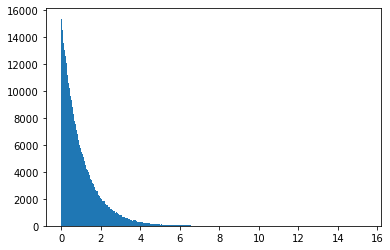

In [58]:
w = rv.weibull(lam=1,beta=1,n=1000000)
plt.hist(w, bins=1000)
plt.show()

**Weibull with beta shape parameter set to 5**

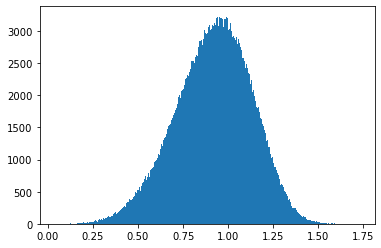

In [59]:
w = rv.weibull(lam=1,beta=5,n=1000000)
plt.hist(w, bins=1000)
plt.show()

**Weibull with lambda = 3 and beta set to 50**

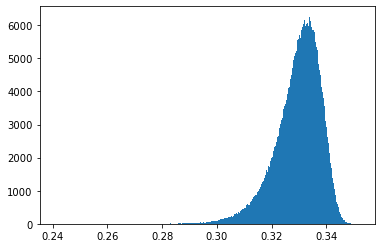

In [60]:
w = rv.weibull(lam=3,beta=50,n=1000000)
plt.hist(w, bins=1000)
plt.show()

### Triangular Random Variates

By default, the randomvariates library will generate Triangular(0,1,2) values from 
a triangular distribution:

In [61]:
rv.triangular()

array([0.33065041])

To generate values from a Triangular distribution with lower bound a, mode b and 
upper bound c, call the triangular() function with a, b, and c set:

In [62]:
rv.triangular(a=-5, b=0, c=5, n=25)

array([-3.34674795,  1.47922979, -1.33870807,  3.91374138, -0.70471334,
        0.58815412, -1.52194718, -1.5675973 , -1.8705518 ,  3.75414264,
       -1.41709137, -2.6771879 ,  0.69065604,  1.32917645,  0.16163681,
       -3.51969307,  0.4528872 ,  2.65936735, -0.32857687, -1.04838153,
        3.03883796, -2.23464003,  0.17873036,  0.23765868, -0.64017362])

**Plot of Tri(0,1,2)**

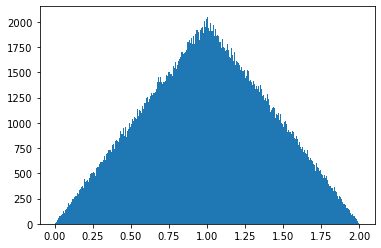

In [63]:
t = rv.triangular(a=0, b=1, c=2, n=1000000)
plt.hist(t, bins=1000)
plt.show()

**Plot of Tri(1,5,7)**

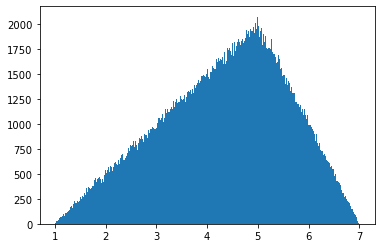

In [64]:
t = rv.triangular(a=1, b=5, c=7, n=1000000)
plt.hist(t, bins=1000)
plt.show()

### Bernoulli Random Values

To generate bernoulli(p) random values, call the **bernoulli()** method with 
probability, p. By default, the **bernoulli()** method generates bernoulli(0.5) random
values.

In [65]:
rv.bernoulli()

array([0])

In [66]:
rv.bernoulli(n=25)

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0])

**To generate bernoulli(0.8) random values, set p=0.8:**


In [67]:
rv.bernoulli(p=0.8, n=25)

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

**Plot of bernoulli p=0.5**

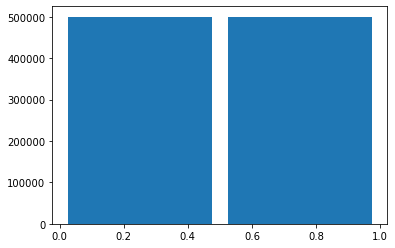

In [68]:
b = rv.bernoulli(p=0.5, n=1000000)
plt.hist(b, bins=2, rwidth=0.9)
plt.show()

**Plot of bernoulli p=0.8**

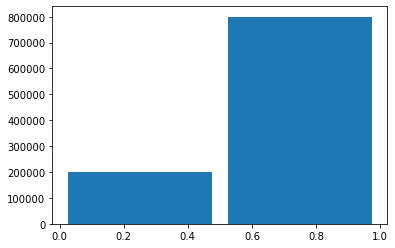

In [69]:
b = rv.bernoulli(p=0.8, n=1000000)
plt.hist(b, bins=2, rwidth=0.9)
plt.show()

### Binomial Random Variatates

Binomial(n,p) random values can be generated with the **binomial()** function.
By default, the **binomial()** function generates 1 trial at p=0.5:

In [70]:
rv.binomial()

array([0])

**Note: Don't confuse t=trials and n=number of values to generate. To generate 25 
binomials with 10 trials, and probability 0.5, we would specify 
binomial(t=10, p=0.5, n=25):**

In [71]:
rv.binomial(t=10, p=0.5, n=25)

array([4, 8, 5, 6, 5, 5, 5, 5, 2, 5, 8, 4, 5, 6, 7, 6, 6, 8, 4, 6, 5, 5,
       7, 6, 5])

**Plot of binomial(10, 0.8)**

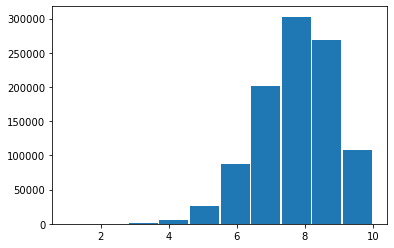

In [72]:
b = rv.binomial(t=10, p=0.8, n=1000000)
plt.hist(b, bins=10, rwidth=0.95)
plt.show()

### Random X-sided Dice Toss

For the D&D fans, the **dicetoss()** function allows you to generate an X-sided
die toss. 

For example, to generate 10, 20-sided dice tosses, simply call the 
**dicetoss()** function. 

By default, **dicetoss()** defaults to a 6-sided die:

In [73]:
rv.dicetoss(n=10)

array([1., 5., 2., 6., 3., 4., 2., 2., 2., 6.])

**To generate 10, 20-sided dice toss, set the side variable to 20:**

In [74]:
rv.dicetoss(sides=20, n=10)

array([ 2., 16.,  6., 20.,  8., 13.,  5.,  5.,  4., 20.])

**Six sided dice toss. Note how all sides have equal probability.**

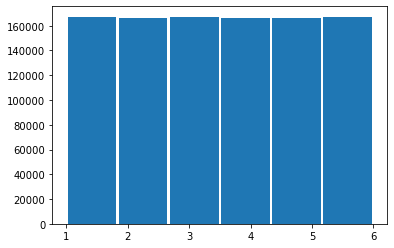

In [75]:
b = rv.dicetoss(n=1000000)
plt.hist(b, bins=6, rwidth=0.95)
plt.show()

**Sum of two 6-sided dice tosses**

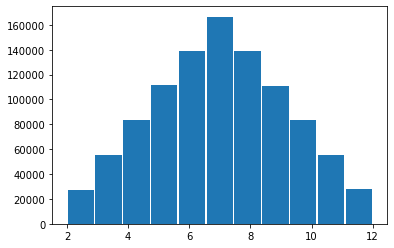

In [76]:
rv1 = random.RandomVariates()
rv2 = random.RandomVariates()
a = rv1.dicetoss(n=1000000)
b = rv2.dicetoss(n=1000000)
plt.hist(a+b, bins=11, rwidth=0.95)
plt.show()

### Geometric Random Variates

To generate geometric random values, use the **geometric()** function. By default, 
the geometric function is set to a probability of 0.5:

In [77]:
rv.geometric()

array([1.])

To generate geometric values with a different probability, set p equal to the new 
probability:


In [78]:
rv.geometric(p=0.42, n=25)

array([1., 3., 1., 7., 1., 2., 1., 1., 1., 7., 1., 1., 2., 3., 2., 1., 2.,
       5., 2., 1., 5., 1., 2., 2., 1.])

**Let's plot some geometric random values to see what things look like:**

**Geometric with p = 0.2**

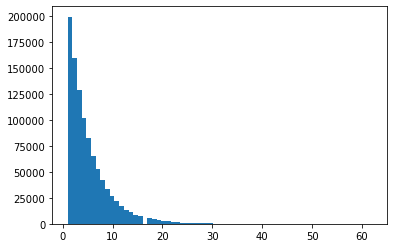

In [81]:
rv.set_seed(101) # Set seed to 101 since 42 doesn't look as nice
g = rv.geometric(p=0.2, n=1000000)
plt.hist(g, bins=65)
plt.show()

**Geometric with p = 0.5**

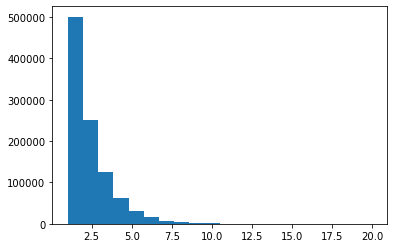

In [82]:
rv.set_seed(123454321) # Set seed to 123454321 for a nice graph
g = rv.geometric(p=0.5, n=1000000)
plt.hist(g, bins=20)
plt.show()

**Geometric with p = 0.95**

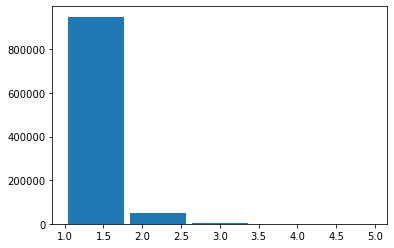

In [88]:
rv.set_seed(101)
g = rv.geometric(p=0.95, n=1000000)
plt.hist(g, bins=5, rwidth=0.9)
plt.show()

### Negative Binomial Random Variates

To generate negative binomial random variates, call the **negbin()** funtion. 

By default **negbin()** will generate values with a probability of 0.5 and 1 trial:

In [89]:
rv.set_seed(42)
rv.negbin()

array([1.])

To generate 25 negbin values with a probability of 0.42 and 10 trials:

In [90]:
rv.negbin(t=10, p=0.42, n=25)

array([15., 28., 35., 35., 26., 17., 21., 41., 31., 27., 16., 19., 23.,
       26., 18., 24., 20., 27., 32., 17., 18., 16., 31., 21., 33.])

**Nice looking negbin distribution with t = 4 and. p = 0.2**

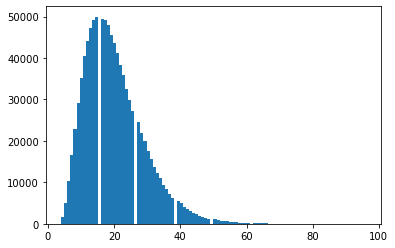

In [91]:
nb = rv.negbin(t=4, p=0.2, n=1000000)
plt.hist(nb, bins=100)
plt.show()

### Chi-Squared Random Variates

Chi-Squared random values can be generated by calling the **chisq()** method.

By default, **chisq()** generates values with df=1:

In [92]:
rv.chisq()

array([2.01343621])

To generate chi-squared values with different degrees of freedom, set df=X where 
X is the degrees of freedom:


In [93]:
rv.chisq(df=3, n=25)

array([4.03013192, 2.1255032 , 1.41496674, 2.49301795, 4.34632967,
       7.07483573, 8.80603908, 0.40890643, 1.02559277, 0.3263966 ,
       1.16851057, 9.41171507, 0.10331964, 0.4620984 , 1.30332824,
       2.86123596, 6.30155659, 2.34574672, 6.51270442, 1.8040176 ,
       2.73061465, 2.18939106, 0.17322089, 1.95769521, 1.34417982])

**Plotting out some chi-squared random values**

Chi-squared with df = 1

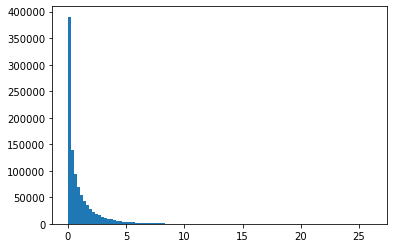

In [94]:
cs = rv.chisq(df=1, n=1000000)
plt.hist(cs, bins=100)
plt.show()

**Chi-squared with df = 10**

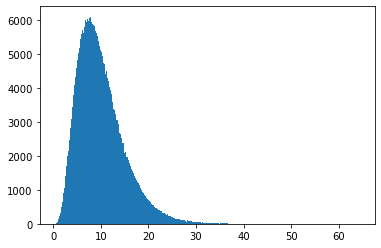

In [95]:
cs = rv.chisq(df=10, n=1000000)
plt.hist(cs, bins=1000)
plt.show()

### Poisson Random Variates

By default, the **poisson()** method will generate poission random values with lam=1:


In [96]:
rv.poisson()

array([3])

To generate possion random variates for different lambda values, set lam=X, 
where X is the new labmda value:


In [97]:
rv.poisson(lam=3, n=25)

array([4, 7, 3, 2, 3, 3, 0, 3, 5, 1, 3, 2, 9, 3, 1, 3, 2, 3, 4, 5, 2, 4,
       5, 7, 2])

**Check the poisson mean and variance. They should be equal to lambda!**

In [98]:
rv.set_seed(42)
p = rv.poisson(lam=3, n=1000000)
print(f"mean: {np.mean(p)}")
print(f"var: {np.var(p)}")

mean: 2.99949
var: 3.038947739900001


**Create some plots of our poisson random values while also checking mean and variance**

Poisson with lambda = 1

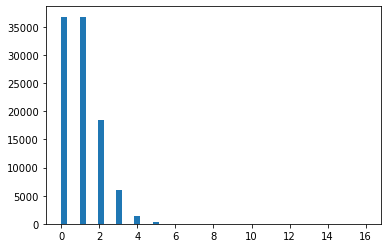

mean: 0.99825
var: 1.0007269375


In [99]:
rv.set_seed(876)
p = rv.poisson(lam=1, n=100000)
plt.hist(p, bins=50)
plt.show()
print(f"mean: {np.mean(p)}")
print(f"var: {np.var(p)}")

Poisson with lambda = 4

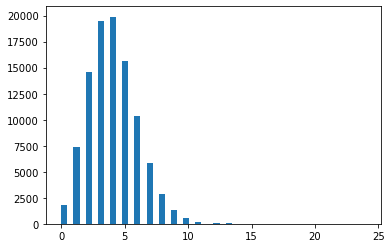

mean: 3.99773
var: 4.016224847099999


In [100]:
p = rv.poisson(lam=4, n=100000)
plt.hist(p, bins=50)
plt.show()
print(f"mean: {np.mean(p)}")
print(f"var: {np.var(p)}")

Poisson with lambda = 10

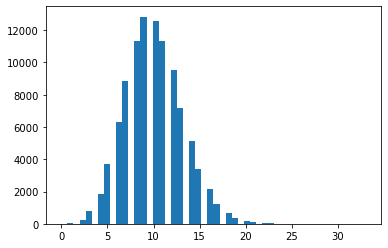

mean: 9.99379
var: 10.021511435899999


In [101]:
p = rv.poisson(lam=10, n=100000)
plt.hist(p, bins=50)
plt.show()
print(f"mean: {np.mean(p)}")
print(f"var: {np.var(p)}")

### Gamma Random Variates

Gamma random values can be generated by calling the **gamma()** function. 

By default, **gamma()** generates values with a shape parameter (k) and scale parameter (theta) 
equal to one:

In [102]:
rv.set_seed(42)
rv.gamma()

array([0.0496442])

To generate gamma values with different shape and scale parameters set k = shape 
and theta = scale. i.e.) k=3, theta=3

In [103]:
rv.gamma(k=3, theta=3, n=25)

array([ 2.86760705,  8.28296535, 15.61018946, 13.89795502, 28.71023072,
        0.98039742, 14.78770565,  8.31682721,  7.12832689, 11.31451427,
       14.12970636,  9.03501294, 18.95392932,  8.94168958,  2.80143093,
        7.09702805,  1.98142127,  6.69417433,  7.64163982, 12.51436153,
        9.84781027,  7.80807741,  6.79817083,  7.22277182, 13.64361073])

**Gererating some histograms of our gamma random variables**

Gamma with k = 1 and theta = 1

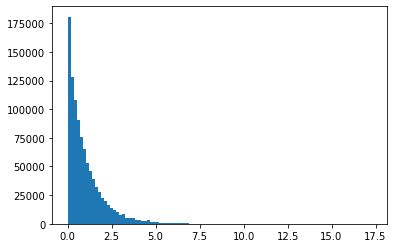

In [104]:
g = rv.gamma(k=1, theta=1, n=1000000)   
plt.hist(g, bins=100)
plt.show()

**Gamma with k = 3 and theta = 1**

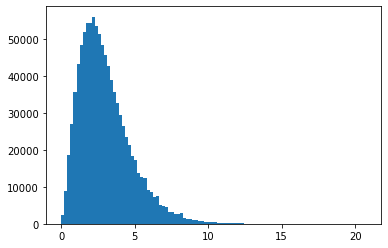

In [105]:
g = rv.gamma(k=3, theta=1, n=1000000)   
plt.hist(g, bins=100)
plt.show()

**Gamma with k = 7 and theta = 3**

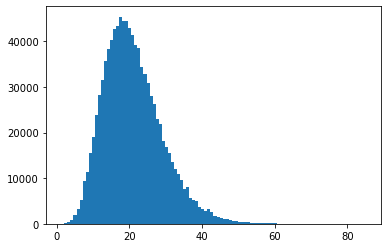

In [106]:
g = rv.gamma(k=7, theta=3, n=1000000)   
plt.hist(g, bins=100)
plt.show()

### Lognormal Random Variate

Lognormal values can be generated with the **lognormal()** function:

In [107]:
rv.set_seed(42)
rv.lognormal()

array([0.24196649])

To generate lognormal values with different mean and standards deviation, specify
the mu=X and sd=Y parameters where mu=X is the mean and sd=Y is the 
standard deviation:

In [108]:
rv.lognormal(mu=5, sd=2, n=10)

array([   8.68926144, 1165.743983  ,  542.36799958,   50.00329616,
       2518.21870637,    6.20023729,    2.58041108,   83.05661697,
        617.74324652,  122.09875036])

**Let's check to see what our lognormal random values look like**

Lognormal with mu = 0 and sd = 1

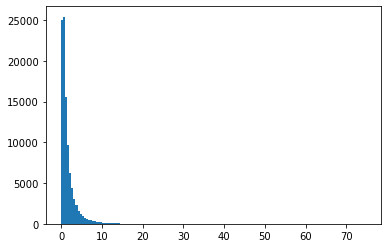

In [117]:
ln = rv.lognormal(mu=0, sd=1, n=100000)
plt.hist(ln, bins=150)
plt.show()

**Lognormal with mu = 3 and sd = 0.15**

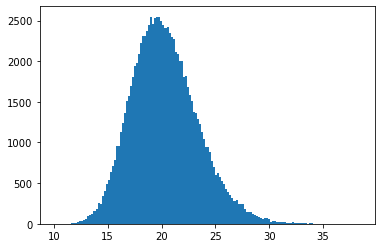

In [110]:
ln = rv.lognormal(mu=3, sd=0.15, n=100000)    
plt.hist(ln, bins=150)
plt.show()

### Beta Random Variates

Beta random values can be generated via the **beta()** method. 

The **beta()** method takes two shape parameters - a and b. By default, the a and b parameters are set to 1:


In [118]:
rv.beta()

array([0.01995716])

To generate beta values with different shape parameters, specify different shape 
values as such:


In [119]:
rv.beta(a = 2, b = 4, n = 25)

array([0.05843224, 0.17390187, 0.50358743, 0.50885326, 0.71498465,
       0.01966699, 0.53999924, 0.18878303, 0.30052695, 0.66454575,
       0.47430718, 0.23385242, 0.69526851, 0.48014572, 0.07415403,
       0.22019374, 0.07180719, 0.17131799, 0.19680721, 0.23783813,
       0.32510779, 0.29333343, 0.20013351, 0.27709332, 0.51118395])

**Check some plots of our beta random values**

Beta with a = 1 and b = 1

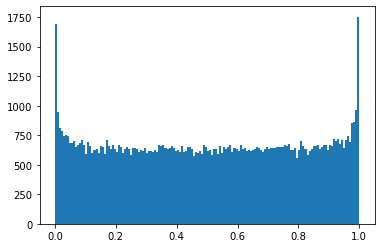

In [120]:
b = rv.beta(a = 1, b = 1, n = 100000)    
plt.hist(b, bins=150)
plt.show()

**Beta with a = 2 and b = 4**

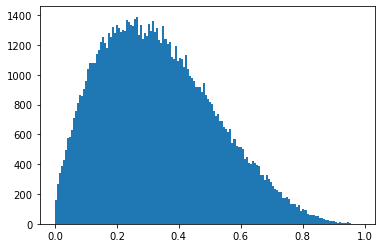

In [121]:
b = rv.beta(a = 2, b = 4, n = 100000)    
plt.hist(b, bins=150)
plt.show()

**Beta with a = 7 and b = 15**

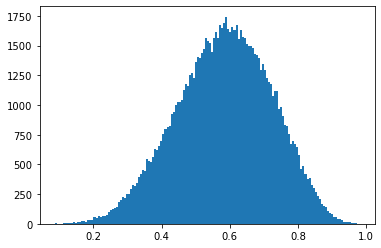

In [122]:
b = rv.beta(a = 7, b = 5, n = 100000)    
plt.hist(b, bins=150)
plt.show()